In [60]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

<img src="https://i0.wp.com/analyticsarora.com/wp-content/uploads/2021/07/K-Means-Pseudocode.png?w=800&ssl=1"/>

### Read the image file and convert it to NumPy Array and reduce the size by scaling to 80%

In [61]:
def ReadImage(img_file):
    """
    Arguments: img_file - path to image file
    Returns: img - numpy array of  the scaled image
    
    """
    img = cv2.cvtColor(cv2.imread(img_file), cv2.COLOR_BGR2RGB)
    print('Original Dimensions : ',img.shape)
    scale_percent = 60 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    print('Resized Dimensions : ',resized.shape)
    return resized   # return the resized image

### Define the $p^{th}$ order distance metric

The Minkowski distance of order $p$ (where $p$ is an integer) between two points

$X=(x_{1},x_{2},\ldots ,x_{n})$ and $Y=(y_{1},y_{2},\ldots ,y_{n})$ $\in \mathbb {R} ^{d}$ is defined as:

$$ D\left(X,Y\right)=\left(\sum _{i=1}^{d}|x_{i}-y_{i}|^{p}\right)^{\frac {1}{p}} $$

Minkowski distance is the generalized distance metric.Here generalized means that we can manipulate the above formula to calculate the distance between two data points in different ways.

As mentioned above, we can manipulate the value of p and calculate the distance in three different ways:-

p = 1, Manhattan Distance

p = 2, Euclidean Distance

p = ∞, Chebychev Distance

In [62]:
def dist_p(vec1,vec2,p):  # Generalised Distance Formula
    L = len(vec1)
    s1 = 0
    for l in range(L):
        diff = np.abs(vec2[l]-vec1[l])
        s1 = s1 + diff**p
    distance = s1**(1/p)
    return(distance)

### Define function to generate the initial mean values from initial labels

In [63]:
def init_mean(K,img_arr,label_arr):
    mean_ls = []   ## List containing mean values of the clusters
    pixel_ls = [[] for k in range(K)] ## Create list of empty lists to store pixels belonging to a certain cluster
    
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k:  ## if the label of the pixel at location [i,j] is 'k'
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:])) ## Fill the kth empty list with this pixel value
                    
    for k in range(K): 
        pixel_mat = np.matrix(pixel_ls[k])
        mean_k = np.mean(pixel_mat,axis=0)
        mean_ls.append(np.ravel(mean_k))
    return(mean_ls)    

### Update labels by comparing distances with previous mean values and generate new labels

In [64]:
def label_update(prev_mean,img_arr,label_arr,p):
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            dist_ls = [] 
            for k in range(len(prev_mean)):
                dist = dist_p(img_arr[i,j,:],prev_mean[k],p) ## Calculate the distance of the pixel at [i,j] with the kth mean
                dist_ls.append(dist)     ## Put the distance values in a list
            dist_arr = np.array(dist_ls)  ## Convert it to a NumPy array
            new_label = np.argmin(dist_arr) ##The new_label of the point is the one which is closest to the pixel at [i,j]
            label_arr[i,j] = new_label      ## Set the new label
    return(label_arr)

### Generate new mean values from the updated labels

In [65]:
def mean_from_label(K,prev_mean,img_arr,label_arr):##label array is the current label array
    pixel_ls = [[] for k in range(K)]  ## Create list of empty lists to store pixels belonging to a certain cluster
    
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k: ## if the label of the pixel at location [i,j] is 'k'
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:])) ## Fill the kth empty list with this pixel value
                    
    for k in range(K):
        if len(pixel_ls[k]) != 0:  ## Only update the means of those clusters which has received at least one new point, else retain the old mean value
            pixel_mat = np.matrix(pixel_ls[k])
            mean_k = np.mean(pixel_mat,axis=0)
            prev_mean[k] = np.ravel(mean_k)##np.ravel to flatten the vector
    new_mean = prev_mean
    return(new_mean)    

### open an Image

In [66]:
image_arr = ReadImage("Clownfish.jpeg") # returns the resized image
print("Before rehape the image",image_arr.shape)
label_arr = np.zeros((image_arr.shape[0],image_arr.shape[1]))
print("The reshaped image",label_arr.shape)

Original Dimensions :  (535, 800, 3)
Resized Dimensions :  (321, 480, 3)
Before rehape the image (321, 480, 3)
The reshaped image (321, 480)


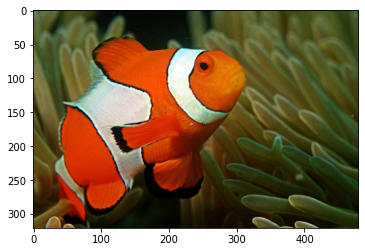

In [67]:
plt.imshow(image_arr)

### Run the K-Means Algorithm and obtain the final labels and means

In [68]:
##it takes all the funcutions
def KMeans(img_arr,label_arr,K,p,maxIter):##initial mean
    
    # randomly labeling the data points before starting the algorithm
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
         label_arr[i,j] = np.random.choice(K)
     
    mean_old = init_mean(K,img_arr,label_arr)
    for t in range(maxIter):
        mean_new=mean_old
        new_label_arr = label_update(mean_old,img_arr,label_arr,p)    #update the label array
        mean_new = mean_from_label(K,mean_old,img_arr,new_label_arr)  #update the mean array
        
        label_arr = new_label_arr ## Update the label array
        
        mean_old = mean_new ## Update the mean values
        
        # if mean_old == mean_new:
        #     break
    return(mean_new,label_arr)

In [69]:
K=5
mean_new,label_arr = KMeans(image_arr,label_arr,K,2,5) #2 is the value of p
                                                       #5 is the iteration

In [70]:
mean_new

[array([88.3368609 , 90.33875994, 42.52149002]),
 array([33.66828756, 30.45967867,  7.05099977]),
 array([218.11382545,  73.34651052,   4.66588946]),
 array([171.77470009,  38.55983615,   3.17331513]),
 array([200.61203285, 210.27224736, 195.25414781])]

## showing the most frequent color in each cluster

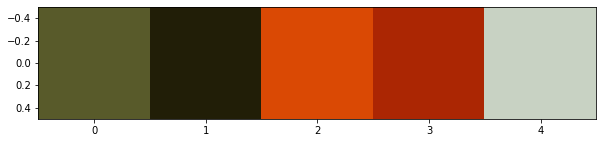

In [71]:

plt.figure(figsize=(10,10))
plt.imshow([np.array(mean_new)/255]);
plt.show()

###  The new labels 

In [72]:
label_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

### Use the finally obtained mean and labels to segment the image

In [73]:
def segmentImage(image_arr,label_arr,mean_ls):
    seg_image = np.zeros((image_arr.shape[0],image_arr.shape[1],image_arr.shape[2]))
    for i in range(seg_image.shape[0]):
        for j in range(seg_image.shape[1]):
            k = label_arr[i,j]
            seg_image[i,j,:] = mean_ls[int(k)]
    seg_image = seg_image.astype(np.uint8)
    plt.imshow(seg_image);

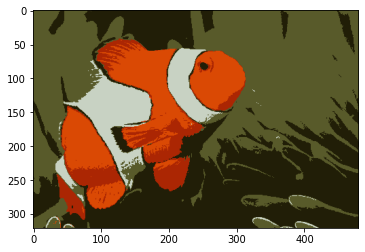

In [74]:
segmentImage(image_arr,label_arr,mean_new)

## Comparison between Manhatten Distance and Euclidean Distance

p = 1, Manhattan Distance

p = 2, Euclidean Distance

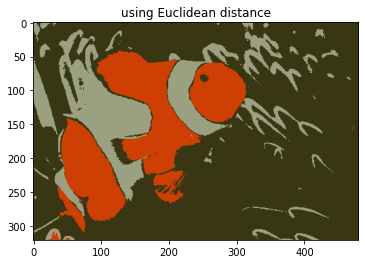

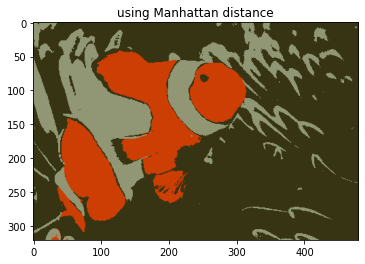

<Figure size 432x288 with 0 Axes>

In [75]:
K=3
plt.title("using Euclidean distance")
mean_new,label_arr = KMeans(
        image_arr,label_arr,K,2,3) # Euclidean Distance                                                                                           
segmentImage(image_arr,label_arr,mean_new);
plt.figure();

plt.title("using Manhattan distance")
mean_new,label_arr = KMeans(
        image_arr,label_arr,K,1,3) # Manhattan Distance                                                                                           
segmentImage(image_arr,label_arr,mean_new);
plt.figure();

## Trying different number of itterations

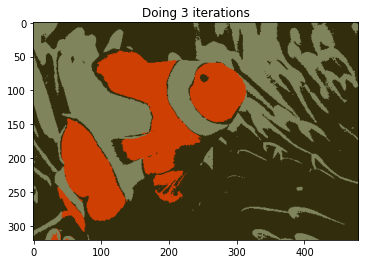

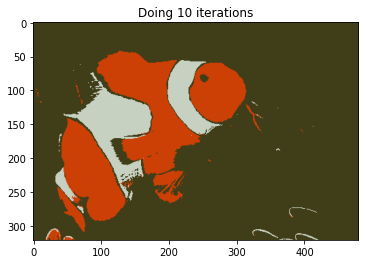

<Figure size 432x288 with 0 Axes>

In [76]:
K=3
plt.title("Doing 3 iterations")
mean_new,label_arr = KMeans(
        image_arr,label_arr,K,2,3)                                                                                         
segmentImage(image_arr,label_arr,mean_new);
plt.figure();

plt.title("Doing 10 iterations")
mean_new,label_arr = KMeans(
        image_arr,label_arr,K,2,10)                                                                                           
segmentImage(image_arr,label_arr,mean_new);
plt.figure(); 

### Trying different K

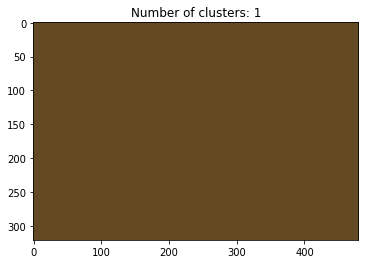

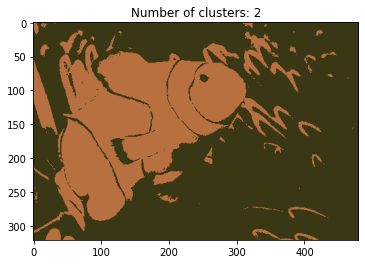

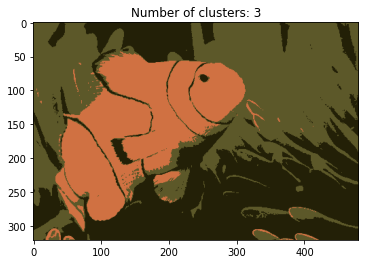

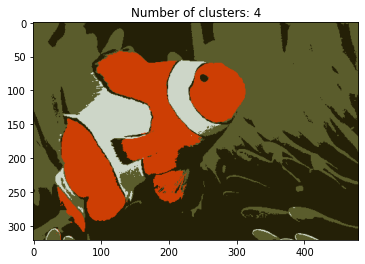

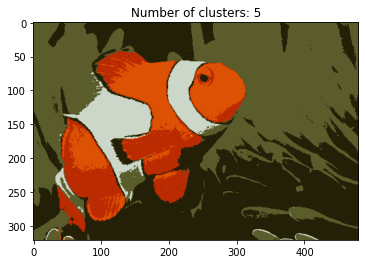

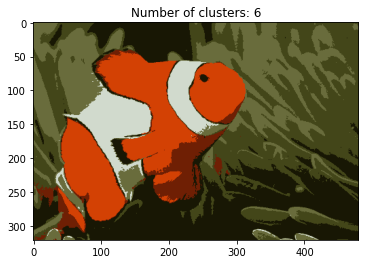

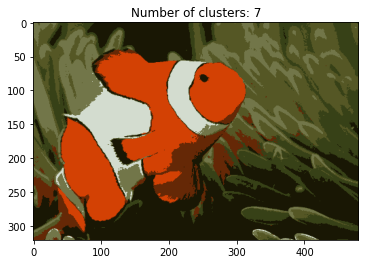

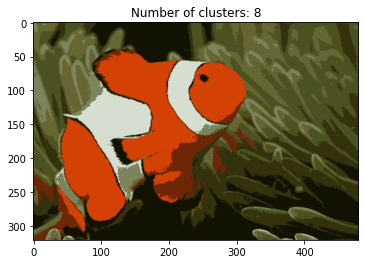

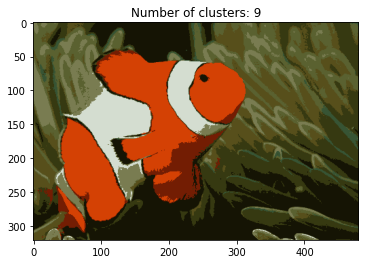

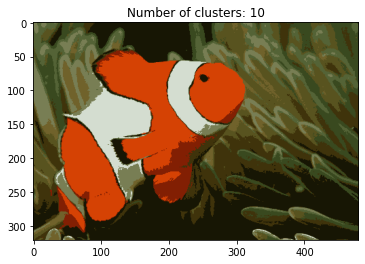

In [77]:
for K in range(1,11):
    mean_new,label_arr = KMeans(image_arr,label_arr,K,2,5) 
                                                     
    plt.figure();
    plt.title("Number of clusters: "+str(K))                                                        
    segmentImage(image_arr,label_arr,mean_new)

# Comparison Between Sklearn Library and 

Original Dimensions :  (535, 800, 3)
Resized Dimensions :  (321, 480, 3)


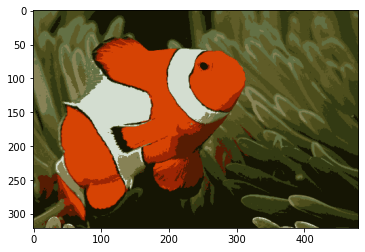

In [78]:
image_arr = ReadImage("Clownfish.jpeg") # returns the resized image
label_arr = np.zeros((image_arr.shape[0],image_arr.shape[1]))

k=3
mean_new,label_arr = KMeans(image_arr,label_arr,K,2,5)                                                    
plt.figure();                                                       
segmentImage(image_arr,label_arr,mean_new)

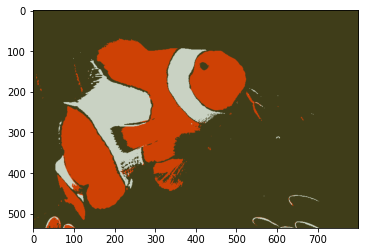

In [79]:
from sklearn.cluster import KMeans
pic = plt.imread('Clownfish.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])

kmeans = KMeans(n_clusters=3,max_iter=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

## Empirical Analysis
Now, i will compare between the growth rate of the two algorithms

In [ ]:
def ReadImage(img_file):
    """
    Arguments: img_file - path to image file
    Returns: img - numpy array of  the scaled image
    
    """
    img = cv2.cvtColor(cv2.imread(img_file), cv2.COLOR_BGR2RGB)
    print('Original Dimensions : ',img.shape)
    scale_percent = 60 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    print('Resized Dimensions : ',resized.shape)
    return resized   # return the resized image

In [ ]:
def dist_p(vec1,vec2,p):  # Generalised Distance Formula
    L = len(vec1)
    s1 = 0
    for l in range(L):
        diff = np.abs(vec2[l]-vec1[l])
        s1 = s1 + diff**p
    distance = s1**(1/p)
    return(distance)

### Define function to generate the initial mean values from initial labels

In [ ]:
def init_mean(K,img_arr,label_arr):
    mean_ls = [] ## List containing mean values of the clusters
    pixel_ls = [[] for k in range(K)] ## Create list of empty lists to store pixels belonging to a certain cluster
    
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k:  ## if the label of the pixel at location [i,j] is 'k'
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:])) ## Fill the kth empty list with this pixel value
                    
    for k in range(K): 
        pixel_mat = np.matrix(pixel_ls[k])
        mean_k = np.mean(pixel_mat,axis=0)
        mean_ls.append(np.ravel(mean_k))
    return(mean_ls)    

### Update labels by comparing distances with previous mean values and generate new labels

In [ ]:
def label_update(prev_mean,img_arr,label_arr,p):
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            dist_ls = [] 
            for k in range(len(prev_mean)):
                dist = dist_p(img_arr[i,j,:],prev_mean[k],p) ## Calculate the distance of the pixel at [i,j] with the kth mean
                dist_ls.append(dist)     ## Put the distance values in a list
            dist_arr = np.array(dist_ls)  ## Convert it to a NumPy array
            new_label = np.argmin(dist_arr) ##The new_label of the point is the one which is closest to the pixel at [i,j]
            label_arr[i,j] = new_label      ## Set the new label
    return(label_arr)

### Generate new mean values from the updated labels

In [ ]:
def mean_from_label(K,prev_mean,img_arr,label_arr):##label array is the current label array
    pixel_ls = [[] for k in range(K)]  ## Create list of empty lists to store pixels belonging to a certain cluster
    
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k: ## if the label of the pixel at location [i,j] is 'k'
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:])) ## Fill the kth empty list with this pixel value
                    
    for k in range(K):
        if len(pixel_ls[k]) != 0:  ## Only update the means of those clusters which has received at least one new point, else retain the old mean value
            pixel_mat = np.matrix(pixel_ls[k])
            mean_k = np.mean(pixel_mat,axis=0)
            prev_mean[k] = np.ravel(mean_k)##np.ravel to flatten the vector
    new_mean = prev_mean
    return(new_mean)    

In [ ]:
image_arr = ReadImage("Clownfish.jpeg") # returns the resized image
print("Before rehape the image",image_arr.shape)
label_arr = np.zeros((image_arr.shape[0],image_arr.shape[1]))
print("The reshaped image",label_arr.shape)

Original Dimensions :  (535, 800, 3)
Resized Dimensions :  (321, 480, 3)
Before rehape the image (321, 480, 3)
The reshaped image (321, 480)


### Run the K-Means Algorithm and obtain the final labels and means

In [ ]:
##it takes all the funcutions
def KMeans(img_arr,label_arr,K,p,maxIter):##initial mean
    
    # randomly labeling the data points before starting the algorithm
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
         label_arr[i,j] = np.random.choice(K)
    
    
    mean_old = init_mean(K,img_arr,label_arr)
    for t in range(maxIter):
        mean_new=mean_old
        new_label_arr = label_update(mean_old,img_arr,label_arr,p)    #update the label array
        mean_new = mean_from_label(K,mean_old,img_arr,new_label_arr)  #update the mean array
        
        label_arr = new_label_arr ## Update the label array
        
        mean_old = mean_new ## Update the mean values
        
        # if mean_old == mean_new:
        #     break
    return(mean_new,label_arr)

In [ ]:
def new_segmentImage(image_arr,label_arr,mean_ls):
    seg_image = np.zeros((image_arr.shape[0],image_arr.shape[1],image_arr.shape[2]))
    for i in range(seg_image.shape[0]):
        for j in range(seg_image.shape[1]):
            k = label_arr[i,j]
            seg_image[i,j,:] = mean_ls[int(k)]
    seg_image = seg_image.astype(np.uint8)

In [ ]:
import time
import random
times = []
for n in range(1,21):
    start_time = time.perf_counter_ns()
    
    mean_new,label_arr = KMeans(image_arr,label_arr,n,2,3)                                                                                                        
    new_segmentImage(image_arr,label_arr,mean_new)
    
    # Total time = end - start
    execution_time_ns = (time.perf_counter_ns() - start_time)
    times.append(execution_time_ns)

In [ ]:
from sklearn.cluster import KMeans
pic = plt.imread('Clownfish.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])

times1 = []
for n in range(1,21):
    start_time = time.perf_counter_ns()
   
    kmeans = KMeans(n_clusters=n,max_iter=3, random_state=0).fit(pic_n)
    pic2show = kmeans.cluster_centers_[kmeans.labels_]
    cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
    # Total time = end - start
    execution_time_ns = (time.perf_counter_ns() - start_time)
    times1.append(execution_time_ns)

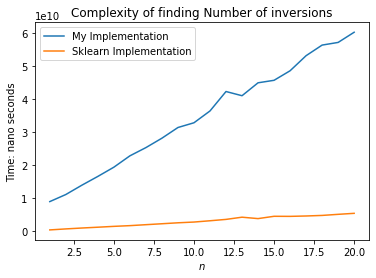

In [ ]:
# the code to plot the curve
f,ax = plt.subplots()
ax.plot(range(1,21),times,label='My Implementation')
ax.plot(range(1,21),times1,label='Sklearn Implementation')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of Image segmentation')
ax.legend(loc=0)
plt.show();